In [3]:
# 4th main stuff

import pandas as pd
import pylab
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [5]:
cancer_df = pd.read_csv("./datasets/cancer.csv")

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
FEATURES = list(cancer_df.columns[:-1])

FEATURES

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [24]:
# helper to build model, with each model being trained with diff number of factors.
def build_model(name_of_y_col, names_of_x_cols,
               dataset, *hyperparameters):
    X= dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]
    
    fa_obj, X = do_factor_analysis(X, Y, *hyperparameters)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
    
    # train model using log_fn helper
    model = logistic_fn(x_train, y_train)
    y_pred = model.predict(x_test)
    
    pred_results = pd.DataFrame({
        "y_test": y_test,
        "y_pred": y_pred
    })
    
    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
    
    acc= accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return {
        "fact_a_obj": fa_obj,
        "transform_x": X,
        "accuracy": acc,
        "precision": prec,
        "recall": recall,
        "confusion_matrix": model_crosstab
    }

In [25]:
# helper to compare models results
def compare_results(result_dict):
    
    for key in result_dict:
        print("Test: ", key)
        print()
        print("accuracy score: ", result_dict[key]["accuracy"])
        print("precision score: ", result_dict[key]["precision"])
        print("recall_score: ", result_dict[key]["recall"])
        print()

In [26]:
# help to find best model by vizing result(plotting acc, prec and recall)
def visualize_results(result_dict):
    
    n_components = list(range(0, 30))
    acc = [result_dict[key]["accuracy"] for key in result_dict]
    precision = [result_dict[key]["precision"] for key in result_dict]    
    recall = [result_dict[key]["recall"] for key in result_dict]    
    
    plt.figure(figsize = (10, 10))
    plt.plot(n_components, acc, label = "Accuracy")
    plt.plot(n_components, precision, label = "Precision")
    plt.plot(n_components, recall, label = "Recall")
    
    pylab.ylim([0.7, 1.2])
    plt.xlabel("n components")
    plt.ylabel("score")
    plt.legend()

In [27]:
# helper to train log model and ret
def logistic_fn(x_train, y_train):
    model = LogisticRegression(solver = "liblinear")
    model.fit(x_train, y_train)
    
    return model

In [28]:
# helper fun for factor analysis
from sklearn.decomposition import FactorAnalysis

def do_factor_analysis(x, y, n):
    
    fact_a = FactorAnalysis(n_components=n, random_state = 10, max_iter=10000)
    x_new = fact_a.fit_transform(x, y)
    
    return fact_a, pd.DataFrame(x_new)

In [29]:
# test things out
result_dict = {}

for i in range(1, 31):
    result_dict["n components - " + str(i)] = build_model("class", FEATURES, cancer_df, i)

In [30]:
# compare results of diff models trained using diff factors n_components
compare_results(result_dict)

Test:  n components - 1

accuracy score:  0.8947368421052632
precision score:  0.8947368421052632
recall_score:  0.9444444444444444

Test:  n components - 2

accuracy score:  0.9210526315789473
precision score:  0.9178082191780822
recall_score:  0.9571428571428572

Test:  n components - 3

accuracy score:  0.9385964912280702
precision score:  0.9014084507042254
recall_score:  1.0

Test:  n components - 4

accuracy score:  0.9298245614035088
precision score:  0.9444444444444444
recall_score:  0.9444444444444444

Test:  n components - 5

accuracy score:  0.9385964912280702
precision score:  0.9402985074626866
recall_score:  0.9545454545454546

Test:  n components - 6

accuracy score:  0.9385964912280702
precision score:  0.9459459459459459
recall_score:  0.958904109589041

Test:  n components - 7

accuracy score:  0.956140350877193
precision score:  0.9367088607594937
recall_score:  1.0

Test:  n components - 8

accuracy score:  0.9385964912280702
precision score:  0.9305555555555556
rec

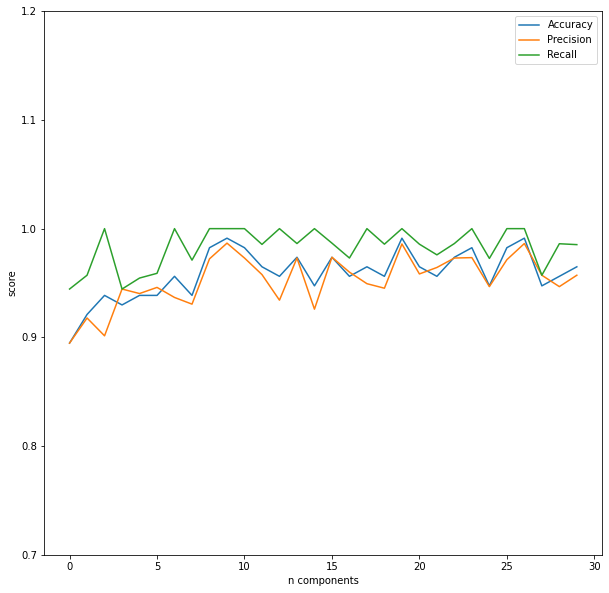

In [31]:
visualize_results(result_dict )